In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()



[[ 0.5524166   0.73732956  0.38478995  0.42479714  0.99348784  0.89417593
   0.98845245  0.32419611  0.27523074  0.01603853  0.06372212  0.39920562
   0.60623676  0.83845821  0.93295773  0.55032787  0.82369311  0.40882313
   0.68357981  0.31666876]
 [ 0.96499603  0.13703918  0.0874507   0.55313593  0.91444779  0.09052754
   0.65588158  0.83938502  0.96088818  0.1028766   0.11375539  0.33753604
   0.61105387  0.6956643   0.77973431  0.20281922  0.95211549  0.08341737
   0.5737501   0.19326704]]


In [41]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)



['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


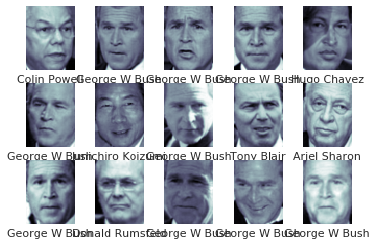

In [42]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [43]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(svd_solver='randomized', n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [44]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)


In [45]:
from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)



CPU times: user 58.2 s, sys: 1.12 s, total: 59.3 s
Wall time: 15.8 s
{'svc__gamma': 0.001, 'svc__C': 10}


In [46]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

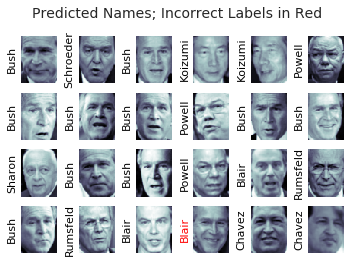

In [47]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [48]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))



                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

      avg / total       0.86      0.85      0.85       337



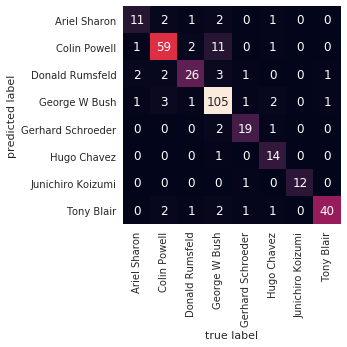

In [49]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [139]:
>>> from sklearn import datasets
>>> iris = datasets.load_iris()
>>> digits = datasets.load_digits()
from sklearn import metrics

#print(digits.data[1])  


x = [[1, 2, 2], [2, 4, 4], [4, 5, 6], [3, 2, 1], [3, 1, 1],[1, 2, 2], [2, 4, 4], [4, 5, 6], [3, 2, 1], [3, 1, 1]]
y = [ 1, 2,3,4,5,6,7,8,9,10]

from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

clf.fit(x, y)
g=[[1, 1, 2]]

predicted=clf.predict(g)
np.mean(predicted == g)
metrics.confusion_matrix(g, g)

ValueError: multiclass-multioutput is not supported

ERROR:root:File `u'workspace/exercise_02_sentiment.py'` not found.
